In [1]:
import pandas as pd
import umap
from matplotlib import pyplot as plt
import numpy as np
from sklearn import cluster, decomposition,linear_model, feature_selection, metrics
from tqdm.notebook import tqdm


C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword 

In [2]:
df=pd.read_csv('Wenu.csv')
df['type']=df['type'].map(lambda x: 0 if x=="EB" else 1)

del df['Run']
del df['Event']

df.head(5)

,pt,eta,phi,Q,type,delEta,delPhi,sigmaEtaEta,HoverE,isoTrack,isoEcal,isoHcal,MET,phiMET
0,38.6387,-0.8499,1.8486,-1,0,0,0,0.0095,0.0000,0.0000,1.2241,0.0000,46.7884,-1.3886
1,59.1666,-2.1095,-2.5163,1,1,0,0,0.0214,0.0177,20.4771,2.5441,6.7450,15.0179,1.1503
2,31.7262,2.4504,2.8956,1,1,0,0,0.0288,0.0000,0.7775,1.8222,0.3663,20.6550,-0.2703
3,73.4109,-1.3951,2.0052,-1,0,0,0,0.0100,0.0000,22.8584,8.0151,8.2951,3.2858,-0.7739
4,49.1363,-2.4326,3.0219,1,1,0,0,0.0271,0.0000,0.0000,0.1154,0.0000,3.1425,2.5081


In [3]:
 df.columns

Index(['pt', 'eta', 'phi', 'Q', 'type', 'delEta', 'delPhi', 'sigmaEtaEta',
       'HoverE', 'isoTrack', 'isoEcal', 'isoHcal', 'MET', 'phiMET'],
      dtype='object')

# Correlation Coefficient (A1)

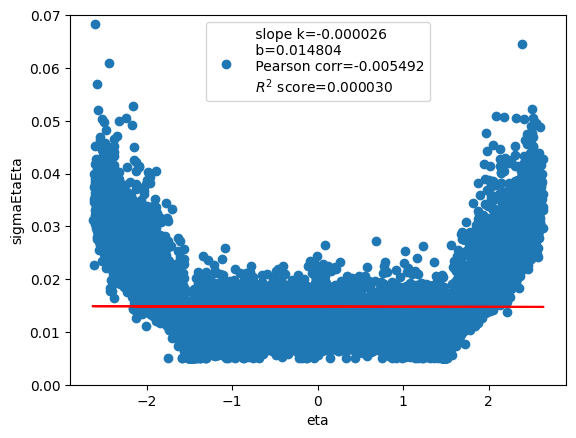

In [21]:
x=df['eta'].values.reshape((-1,1))


y=df['sigmaEtaEta'].map(lambda x: x if x>0.005 else 0.005)

y=y.values.reshape((-1,1))

reg = linear_model.LinearRegression().fit(x,y)
                                          
reg.score(x, y)
b=reg.predict(np.array([[0]]))
corr=np.corrcoef(x.flatten(), y.flatten())[0, 1]

plt.scatter(x,y)
plt.plot(x,x*reg.coef_+b,color='red')
plt.legend([f' slope k={reg.coef_[0,0]:2f}\n b={b[0,0]:2f}\n Pearson corr={corr:2f}\n $R^2$ score={reg.score(x,y):2f}'])
plt.xlabel('eta')
plt.ylabel('sigmaEtaEta')
plt.ylim(0,0.07)
plt.show()

In [22]:
predicted=reg.predict(x)

In [28]:
np.mean(abs(y-predicted)/predicted)

0.42295970293047713

# Clustering

In [ ]:
reducer=umap.UMAP(n_components=2)

reduced_data=reducer.fit_transform(df)

In [4]:
kmeans = cluster.KMeans(n_clusters=2, n_init="auto").fit(df)


  0%|          | 0/19 [00:00<?, ?it/s]

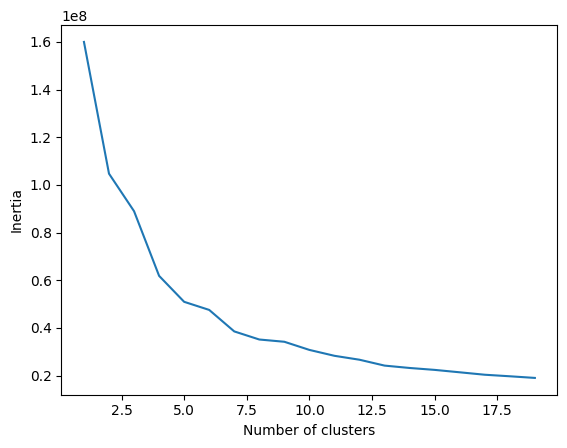

In [65]:
inertias=[]
for i in tqdm(range(1,20)):
    kmeans = cluster.KMeans(n_clusters=i, n_init="auto").fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,20),inertias )
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

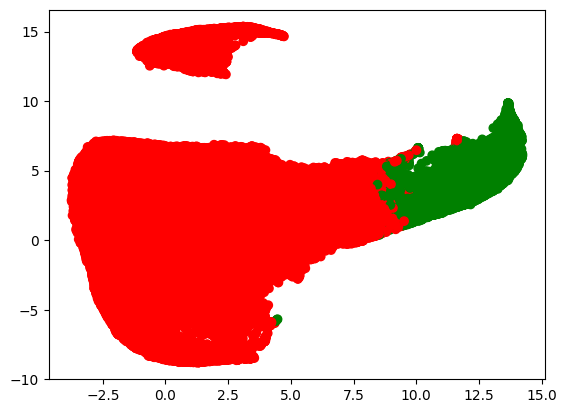

In [5]:
colors_c=['red', 'green','yellow']
# x_k=df['Q']
# x_k=df['type']
x_k=kmeans.labels_
colors_c=[ colors_c[i] for i in x_k]

plt.scatter(reduced_data[:,0],reduced_data[:,1], color=colors_c)
plt.show()

In [44]:
pca = decomposition.PCA(n_components=2)
reduced_pca=pca.fit_transform(df)


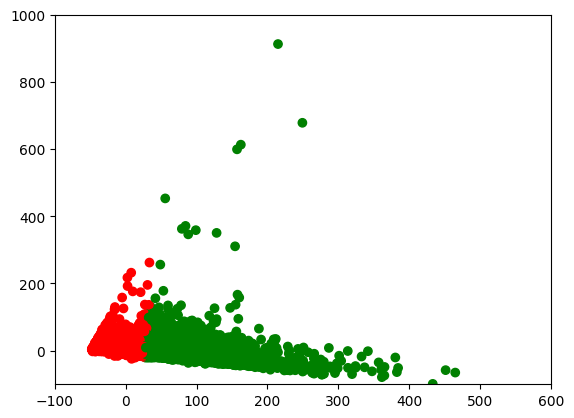

In [47]:
colors_c=['red', 'green','yellow']
# x_k=df['Q']
x_k=kmeans.labels_
colors_c=[ colors_c[i] for i in x_k]

plt.scatter(reduced_pca[:,0],reduced_pca[:,1], color=colors_c)
plt.ylim(-100,1000)
plt.xlim(-100,600)
plt.show()

In [ ]:
kmeans = cluster.KMeans(n_clusters=2, n_init="auto").fit(df)


# Contingency table

In [31]:
df['eta_b']

0                                                        0
1                                                        0
2        <function <lambda>.<locals>.<lambda> at 0x0000...
3                                                        0
4                                                        0
                               ...                        
99995    <function <lambda>.<locals>.<lambda> at 0x0000...
99996    <function <lambda>.<locals>.<lambda> at 0x0000...
99997                                                    0
99998                                                    0
99999                                                    0
Name: eta_b, Length: 100000, dtype: object

<Axes: xlabel='eta', ylabel='count'>

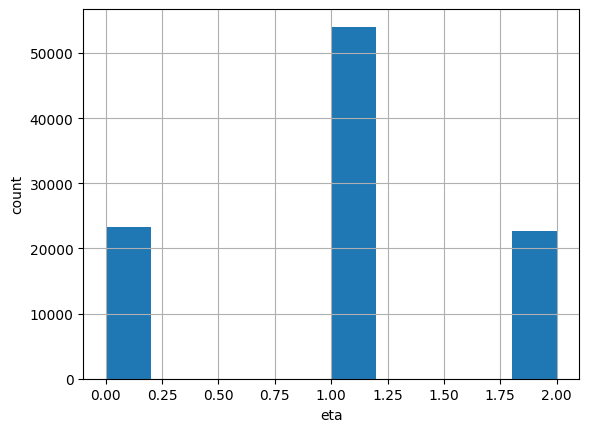

In [33]:
def norm(x):
    if x<-1.5:
        return 0
    elif x>=-1.5 and x<1.5:
        return 1
    else:
        return 2
    
df['eta_b']=df['eta'].map(norm)
plt.xlabel('eta')
plt.ylabel('count')
df['eta_b'].hist()

In [36]:
pd.crosstab(df.eta_b, df.type)

type,0,1
eta_b,,
0,25,23313
1,54036,15
2,20,22591


In [41]:
a=pd.crosstab(df.eta_b, df.type).values
a[:,0]=a[:,0]/a.sum(axis=1)[0]
a

array([[    0, 23313],
       [    2,    15],
       [    0, 22591]], dtype=int64)

In [45]:
a.sum(axis=0)

array([    2, 45919], dtype=int64)

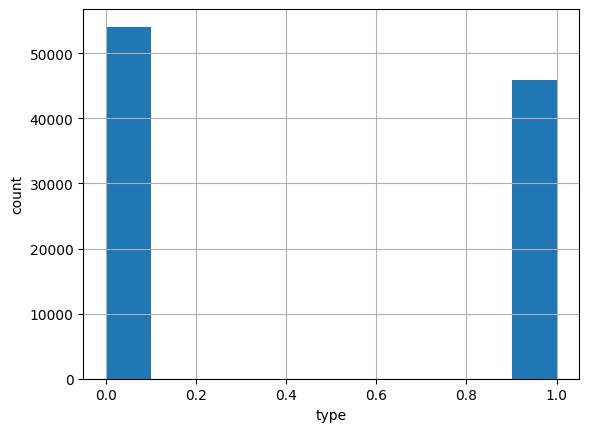

In [37]:
df['type'].hist()
plt.xlabel('type')
plt.ylabel('count')
plt.show()